In [10]:
import pandas as pd
import matplotlib.pyplot as plt

GSPC_2004 = pd.read_csv("GSPC_2004.csv")
GSPC_2005 = pd.read_csv("GSPC_2005.csv")
FIGRX_2004 = pd.read_csv("FIGRX_2004.csv")
FIGRX_2005 = pd.read_csv("FIGRX_2005.csv")
EURUSD_2004 = pd.read_csv("EURUSD_2004.csv")
EURUSD_2005 = pd.read_csv("EURUSD_2005.csv")


In [11]:
# preprocesseor

GSPC_2004 = GSPC_2004.sort_values(by='Date')
date_GSPC_2004 = GSPC_2004['Date'].str.split(pat = '-',expand=True)
date_GSPC_2004.columns = ['year','month','date']
date_GSPC_2004["year"] = date_GSPC_2004["year"].astype(int)
date_GSPC_2004["month"] = date_GSPC_2004["month"].astype(int)
date_GSPC_2004["date"] = date_GSPC_2004["date"].astype(int)
GSPC_2004 = pd.concat([GSPC_2004,date_GSPC_2004],axis=1) 
GSPC_2004 = GSPC_2004.drop(['Date','Open','High','Low','Volume','Adj Close'],axis=1)
GSPC_2004.columns = ['GSPC',"year","month","date"]
# GSPC_2004

In [12]:
EURUSD_2004.columns = ['Ind',"Date","Week","Rate"]
EURUSD_2005.columns = ['Ind',"Date","Week","Rate"]
date_EURASD = EURUSD_2004['Date'].str.split(pat = '/',expand=True)
date_EURASD.columns = ['month','date','year']
date_EURASD["year"] = date_EURASD["year"].astype(int)
date_EURASD["month"] = date_EURASD["month"].astype(int)
date_EURASD["date"] = date_EURASD["date"].astype(int)
EURUSD_2004 = pd.concat([EURUSD_2004,date_EURASD],axis=1) 
EURUSD_2004 = EURUSD_2004.drop(['Ind', 'Date', 'Week'],axis=1)
# EURUSD_2004

In [13]:
date_FIGRX_2004 = FIGRX_2004['Date'].str.split(pat = '-',expand=True)
date_FIGRX_2004.columns = ['year','month','date']
date_FIGRX_2004["year"] = date_FIGRX_2004["year"].astype(int)
date_FIGRX_2004["month"] = date_FIGRX_2004["month"].astype(int)
date_FIGRX_2004["date"] = date_FIGRX_2004["date"].astype(int)
FIGRX_2004 = pd.concat([FIGRX_2004,date_FIGRX_2004],axis=1) 
FIGRX_2004 = FIGRX_2004.drop(['Date','Open','High','Low','Volume','Adj Close'],axis=1)
FIGRX_2004.columns = ['FIGRX',"year","month","date"]

In [14]:
data_2004 = pd.merge(GSPC_2004,FIGRX_2004)
data_2004 = pd.merge(data_2004,EURUSD_2004)
# print(data_2004)

data_2004.insert(0,column='GSPC_Change',value='')
for i in range(1,len(data_2004.axes[0])):
    y = data_2004.at[i-1,'GSPC'].astype(float)
    t = data_2004.at[i,'GSPC'].astype(float)
    data_2004.at[i,'GSPC_Change'] = ((t-y)/y)*100

data_2004.insert(1,column='EURUSD_Change',value='')
for i in range(1,len(data_2004.axes[0])):
    y = data_2004.at[i-1,'Rate'].astype(float)
    t = data_2004.at[i,'Rate'].astype(float)
    data_2004.at[i,'EURUSD_Change'] = ((t-y)/y)*100

data_2004.insert(2,column='FIGRX_Change',value='')
for i in range(1,len(data_2004.axes[0])):
    y = data_2004.at[i-1,'FIGRX'].astype(float)
    t = data_2004.at[i,'FIGRX'].astype(float)
    data_2004.at[i,'FIGRX_Change'] = ((t-y)/y)*100

data_2004.insert(3,column='y',value='')
for i in range(1,len(data_2004.axes[0])):
    y = data_2004.at[i,'FIGRX_Change'].astype(float)
    if y<0:
        data_2004.at[i,'y'] = 0
    else:
        data_2004.at[i,'y'] = 1
# data_2004


    GSPC_Change EURUSD_Change FIGRX_Change  y
1      0.496302     -0.820793     1.717791  1
2     -0.888755     -0.623244    -0.120631  0
3      0.478669      0.377834    -0.040258  0
4     -0.533165      0.524928    -0.281917  0
5      0.829454      0.075144     0.565428  1
..          ...           ...          ... ..
237    0.341781     -0.096303     0.474283  1
238    0.046297      -0.75644     0.798834  1
239    0.274351     -0.567944     1.152738  1
240    0.008241     -0.401596     0.391741  1
241   -0.134317      0.636153     0.035474  1

[241 rows x 4 columns]


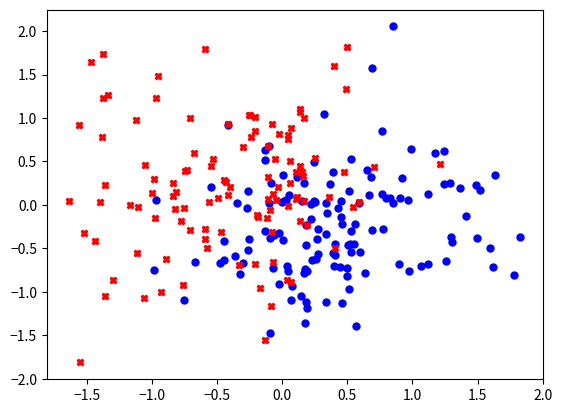

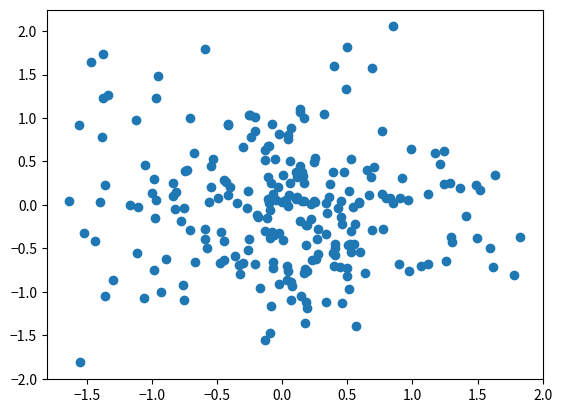

In [15]:
data_2004 = data_2004.drop([ 'GSPC', 'year','month', 'date', 'FIGRX', 'Rate'],axis=1)
data_2004 = data_2004.drop([0])

x = data_2004[data_2004['y']==1]
y = data_2004[data_2004['y']==0]
print(data_2004)

plt.plot(x['GSPC_Change'],x["EURUSD_Change"],"bo",markersize=5)
#畫出叉叉的點，rX：r代表紅色、X代表叉叉、marksize為大小
plt.plot(y['GSPC_Change'],y["EURUSD_Change"],"rX",markersize=5)
plt.show()
plt.scatter(data_2004['GSPC_Change'],data_2004['EURUSD_Change'])
plt.show()


In [16]:
from sklearn.model_selection import train_test_split

data_2004['GSPC_Change'] = pd.to_numeric(data_2004['GSPC_Change'], errors='coerce')
data_2004['EURUSD_Change'] = pd.to_numeric(data_2004['EURUSD_Change'], errors='coerce')

X = data_2004.drop(['FIGRX_Change', 'y'], axis=1)
Y = data_2004['FIGRX_Change']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# scaler = StandardScaler()
x_train=scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from xgboost import XGBRegressor
from stocker import Stocker

stock = Stocker('AAPL')  # 以苹果公司（AAPL）为例
stock

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

model = XGBRegressor(learning_rate= 0.1)
param_space = {
    'n_estimators': randint(70, 150),
    'max_depth': randint(1, 5),
    'gamma': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

random_search = RandomizedSearchCV(model, param_space, scoring='neg_mean_squared_error', cv=5, n_iter=20, n_jobs=-1, random_state=42)
random_search.fit(X_train, Y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)
y_pred_binary = (y_pred > 0).astype(int)
print('Mean squared error: %.3f' % mean_squared_error(Y_test, y_pred))
print('Variance score: %.3f' % r2_score(Y_test, y_pred))
print('Score: %.3f' % best_model.score(X_test, Y_test))

# print(best_params,best_model)
# print(search.best_params_)
model=best_model

Mean squared error: 0.222
Variance score: 0.572
Score: 0.572


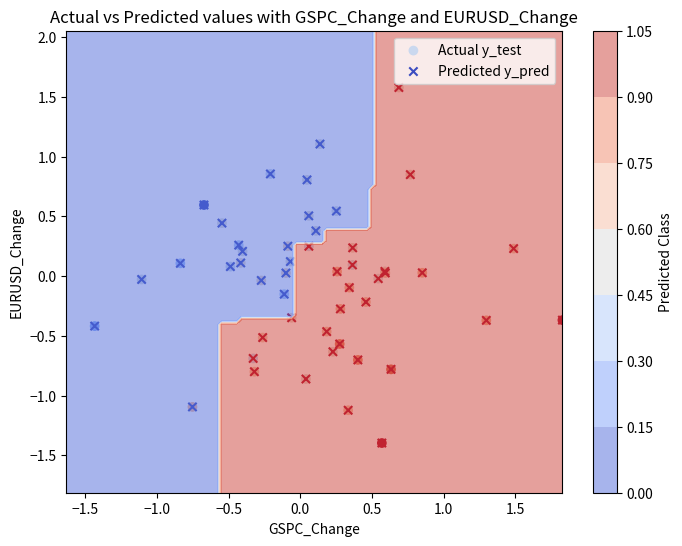

In [ ]:
# Plotting actual y_test and predicted y_pred values with x1 and x2
plt.figure(figsize=(8, 6))

# Scatter plot for actual y_test
plt.scatter(X_test['GSPC_Change'], X_test['EURUSD_Change'], c=Y_test, cmap='coolwarm', label='Actual y_test')

# Scatter plot for predicted y_pred with different marker
plt.scatter(X_test['GSPC_Change'], X_test['EURUSD_Change'], c=y_pred_binary, cmap='coolwarm', marker='x', label='Predicted y_pred')

x1_values = np.linspace(min(X['GSPC_Change']), max(X['GSPC_Change']), 100)
x2_values = np.linspace(min(X['EURUSD_Change']), max(X['EURUSD_Change']), 100)
x1_mesh, x2_mesh = np.meshgrid(x1_values, x2_values)
X_mesh = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]

y_pred_mesh = model.predict(X_mesh)
y_pred_mesh_binary = (y_pred_mesh > 0).astype(int).reshape(x1_mesh.shape)

plt.contourf(x1_mesh, x2_mesh, y_pred_mesh_binary, cmap='coolwarm', alpha=0.5)

plt.xlabel('GSPC_Change')
plt.ylabel('EURUSD_Change')
plt.title('Actual vs Predicted values with GSPC_Change and EURUSD_Change')
plt.legend()
plt.colorbar(label='Predicted Class')
plt.show()


     GSPC_Change  EURUSD_Change
116    -0.545303       0.209345
206     0.387373      -0.547293
217    -0.025483      -0.324853
133     0.270596      -0.394812
85     -1.053973       0.455280
..           ...            ...
107    -0.983748       0.303962
15      0.498901       1.821806
93      0.046846       0.754635
180     0.427004      -0.038143
103     1.596437      -0.495292

[192 rows x 2 columns]
116    1
206    1
217    1
133    1
85     0
      ..
107    0
15     0
93     0
180    1
103    1
Name: y, Length: 192, dtype: int32
[0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]


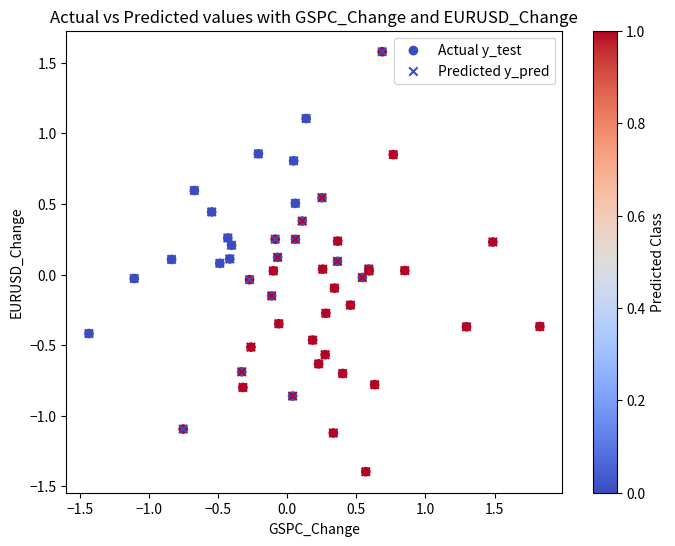

Score: 0.714


In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

X = data_2004.drop(['FIGRX_Change','y'],axis=1)
y = data_2004['y'].astype(int)

X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train)
print(y_train)

Qda = QuadraticDiscriminantAnalysis()
Qda.fit(X_train,y_train)
print(Qda.predict(X_test))
y_pred = Qda.predict(X_test)

plt.figure(figsize=(8, 6))

# Scatter plot for actual y_test
plt.scatter(X_test['GSPC_Change'], X_test['EURUSD_Change'], c=y_test, cmap='coolwarm', label='Actual y_test')

# Scatter plot for predicted y_pred with different marker
plt.scatter(X_test['GSPC_Change'], X_test['EURUSD_Change'], c=y_pred, cmap='coolwarm', marker='x', label='Predicted y_pred')

plt.xlabel('GSPC_Change')
plt.ylabel('EURUSD_Change')
plt.title('Actual vs Predicted values with GSPC_Change and EURUSD_Change')
plt.legend()
plt.colorbar(label='Predicted Class')
plt.show()


print('Score: %.3f' % Qda.score(X_test, y_test))